In [31]:
# Import third party libraries

# Numerical library
import numpy as np

# Used for matrix inversion
from numpy.linalg import inv

# Plotting library
import matplotlib.pyplot as plt

# Allows for printing inline for jupyter notebook
%matplotlib inline 

In [32]:
# Load datasets and store in ndarray
training_data = open('housing_train.txt','r')
X_init_train = np.loadtxt(training_data)

testing_data = open('housing_test.txt', 'r')
X_init_test = np.loadtxt(testing_data)

In [33]:
# Split off known target values
y_train = X_init_train[:,13]
y_test = X_init_test[:,13]

# Add dimension to y_train and transpose
y_train = y_train[np.newaxis].T
y_test = y_test[np.newaxis].T

In [34]:
# Remove column 13 from X
X_train = np.delete(X_init_train, 13, axis=1)
X_test = np.delete(X_init_test, 13, axis=1)

# Function to create array of dummy ones and returned 
# columnar vector
def make_dummy_vector(target):
    temp = np.ones(len(target))
    return temp[np.newaxis].T

# Create dummy 1 values
dummy_train = make_dummy_vector(X_train)
dummy_test = make_dummy_vector(X_test)

# Add dummy data to feature matrices
X_train = np.concatenate((dummy_train, X_train), axis=1)
X_test = np.concatenate((dummy_test, X_test), axis=1)

## WE SHOULD TALK ABOUT THIS AS A GROUP
# Transpose X for further calculations
#X_train = X_train.T
#X_test = X_test.T

print X_train.shape

(433L, 14L)


In [35]:
## PART 2
# Compute optimal weight vector w -- (X^T * X)^-1 (X^T * Y)
def calc_w_vector(X, y):
    return np.dot(inv(np.dot(X.T,X)), np.dot(X.T,y))

def alt_calc(X,y):
    return np.dot(np.dot(inv(X), inv(X.T), np.dot(X.T,y)))
    
# Limit printout to 3 decimal places
np.set_printoptions(precision=3)

# Caculate w vectors
w_train = calc_w_vector(X_train,y_train)
w_test = calc_w_vector(X_test,y_test)

# Print both weight vectors to console
print 'w_train vector:'
print('\n'.join('{}: {}'.format(*k) for k in enumerate(w_train)))

print ' \r\nw_test vector:'
print('\n'.join('{}: {}'.format(*k) for k in enumerate(w_test)))

w_train vector:
0: [ 39.584]
1: [-0.101]
2: [ 0.046]
3: [-0.003]
4: [ 3.072]
5: [-17.225]
6: [ 3.711]
7: [ 0.007]
8: [-1.599]
9: [ 0.374]
10: [-0.016]
11: [-1.024]
12: [ 0.01]
13: [-0.586]
 
w_test vector:
0: [ 16.494]
1: [-0.03]
2: [ 0.01]
3: [-0.16]
4: [ 1.129]
5: [-6.583]
6: [ 4.438]
7: [-0.077]
8: [-0.845]
9: [-0.025]
10: [ 0.005]
11: [-0.7]
12: [ 0.01]
13: [-0.037]


In [36]:
## PART 3
# Functions
def calc_sse(X, y, w):
    return np.dot(np.subtract(y, np.dot(X, w)).T, np.subtract(y,np.dot(X, w)))

# Apply learned weight vectors
target_func_train = np.dot(X_train, w_train)
target_func_test = np.dot(X_test, w_test)

# Print error output, not sure about the 0 values

print 'Training Model: \r\nSSE: %.2f \r\n' % calc_sse(X_train, y_train, w_train)

print 'Testing Model: \r\nSSE: %.2f' % calc_sse(X_test, y_test, w_test)

Training Model: 
SSE: 9561.19 

Testing Model: 
SSE: 852.51


In [37]:
## PART 4
# Repeating part 2 and 3 without a dummy features of 1's in X

# Remove dummy column from both tables
X_train_no_dummy = X_train[:, (1,2,3,4,5,6,7,8,9,10,11,12,13)]
X_test_no_dummy = X_test[:, (1,2,3,4,5,6,7,8,9,10,11,12,13)]

# Caculate w vectors
w_train_no_dummy = calc_w_vector(X_train_no_dummy,y_train)
w_test_no_dummy = calc_w_vector(X_test_no_dummy,y_test)

# Print both weight vectors to console
print 'w_train_no_dummy vector:'
print('\n'.join('{}: {}'.format(*k) for k in enumerate(w_train_no_dummy)))

print ' \r\nw_test_no_dummy vector:'
print('\n'.join('{}: {}'.format(*k) for k in enumerate(w_test_no_dummy)))

w_train_no_dummy vector:
0: [-0.098]
1: [ 0.049]
2: [-0.025]
3: [ 3.451]
4: [-0.355]
5: [ 5.817]
6: [-0.003]
7: [-1.021]
8: [ 0.227]
9: [-0.012]
10: [-0.388]
11: [ 0.017]
12: [-0.485]
 
w_test_no_dummy vector:
0: [ 0.011]
1: [ 0.01]
2: [-0.19]
3: [ 1.126]
4: [-1.137]
5: [ 5.801]
6: [-0.081]
7: [-0.649]
8: [-0.129]
9: [ 0.008]
10: [-0.572]
11: [ 0.011]
12: [ 0.072]


<h3>Thoughts about results</h3>
The above results make it seems like our model will be centered around the orgin beacuse we did not calcuate a true b value in the w vector.

In [38]:
## PART 4 cont.
# Apply learned weight vectors
target_func_train_no_dummy = np.dot(X_train_no_dummy, w_train_no_dummy)
target_func_test_no_dummy = np.dot(X_test_no_dummy, w_test_no_dummy)

# Print error output, not sure about the 0 values
print 'Training Model without Dummy: \r\nSSE: %.2f \r\n' % calc_sse(X_train_no_dummy, y_train, w_train_no_dummy)

print 'Testing Model without dummy: \r\nSSE: %.2f' % calc_sse(X_test_no_dummy, y_test, w_test_no_dummy)

Training Model without Dummy: 
SSE: 10598.06 

Testing Model without dummy: 
SSE: 883.85


In [39]:
# Generate uniform additional uniformly distributed features
feature_one = np.random.uniform(0,10,433)
feature_two = np.random.uniform(0,100,433)
feature_three = np.random.uniform(0,200,433)
feature_four = np.random.uniform(0,400,433)
feature_five = np.random.uniform(0,600,433)
feature_six = np.random.uniform(0,800,433)
feature_seven = np.random.uniform(0,1000,433)
feature_eight = np.random.uniform(0,1200,433)
feature_nine = np.random.uniform(0,1400,433)
feature_ten = np.random.uniform(0,1600,433)

In [40]:
# Set up cases for 2,4,6,8,10 additional uniformly distributed features
#two_feat = X_train[:, ()]

In [41]:
# Part 6 cont
# Split off known target values
y_train = X_init_train[:,13]
y_test = X_init_test[:,13]

# Add dimension to y_train and transpose
y_train = y_train[np.newaxis].T
y_test = y_test[np.newaxis].T

# Remove column 13 from X
X_train = np.delete(X_init_train, 13, axis=1)
X_test = np.delete(X_init_test, 13, axis=1)

# Function to create array of dummy ones and returned 
# columnar vector
def make_dummy_vector(target):
    temp = np.ones(len(target))
    return temp[np.newaxis].T

# Create dummy 1 values
dummy_train = make_dummy_vector(X_train)
dummy_test = make_dummy_vector(X_test)

# Add dummy data to feature matrices
X_train = np.concatenate((dummy_train, X_train), axis=1)
X_test = np.concatenate((dummy_test, X_test), axis=1)

# Compute optimal weight vector w -- (X^T * X + lamda * I)^-1 (X^T * Y)
def calc_w_vector(X, y, lamda):
    I = np.identity(len(np.dot(X.T,X)))
    return np.dot(inv(np.dot(X.T,X) + lamda * I), np.dot(X.T,y))

def alt_calc(X,y):
    return np.dot(np.dot(inv(X), inv(X.T), np.dot(X.T,y)))
    
# Limit printout to 3 decimal places
np.set_printoptions(precision=3)
w_train_results, w_test_results = {}, {}
lamdas = [
    0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09,
    0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,
    1,    2,    3,    4,    5,    6,    7,    8,    9,    10,
    11,   12,   13,   14,   15,   16,   17,   18,   19,   20,
    21,   22,   23,   24,   25,   26,   27,   28,   29,   30,   
    31,   32,   33,   34,   35,   36,   37,   38,   39,   40,   
    41,   42,   43,   44,   45,   46,   47,   48,   49,   50,   
    51,   52,   53,   54,   55,   56,   57,   58,   59,   60,
    61,   62,   63,   64,   65,   66,   67,   68,   69,   70,
    71,   72,   73,   74,   75,   76,   77,   78,   79,   80,   
    81,   82,   83,   84,   85,   86,   87,   88,   89,   90,   
    91,   92,   93,   94,   95,   96,   97,   98,   99,   100
]
# print lamdas
# Caculate w vectors
for lamda in lamdas:
    w_train_results.setdefault(lamda, [])
    w_train = calc_w_vector(X_train,y_train, lamda)
    w_train_results[lamda] = w_train
    
    w_test_results.setdefault(lamda, [])
    w_test = calc_w_vector(X_test,y_test, lamda)
    w_test_results[lamda] = w_test

sse_train, sse_test = {}, {}
# Print error output, not sure about the 0 values
print 'Training Model:'
for key in w_train_results:
    w_train = w_train_results[key]
    target_func_train = np.dot(X_train, w_train)
    sse = calc_sse(X_train, y_train, w_train)
    sse_train.setdefault(key, sse[0][0])
    print '[%0.2f]-SSE: %.2f \r\n' % (key, sse)

print 'Testing Model:'
for key in w_test_results:
    w_test = w_test_results[key]
    target_func_test = np.dot(X_test, w_test)
    sse = calc_sse(X_test, y_test, w_test)
    sse_test.setdefault(key, sse[0][0])
    print '[%0.2f]-SSE: %.2f \r\n' % (key, sse)

Training Model:
[0.50]-SSE: 9790.23 

[1.00]-SSE: 9977.30 

[2.00]-SSE: 10174.59 

[3.00]-SSE: 10275.63 

[4.00]-SSE: 10338.01 

[5.00]-SSE: 10381.24 

[6.00]-SSE: 10413.66 

[7.00]-SSE: 10439.41 

[8.00]-SSE: 10460.77 

[9.00]-SSE: 10479.13 

[10.00]-SSE: 10495.34 

[11.00]-SSE: 10509.96 

[12.00]-SSE: 10523.40 

[13.00]-SSE: 10535.94 

[14.00]-SSE: 10547.77 

[15.00]-SSE: 10559.04 

[16.00]-SSE: 10569.87 

[17.00]-SSE: 10580.35 

[18.00]-SSE: 10590.55 

[19.00]-SSE: 10600.51 

[20.00]-SSE: 10610.29 

[0.03]-SSE: 9563.99 

[22.00]-SSE: 10629.44 

[23.00]-SSE: 10638.85 

[24.00]-SSE: 10648.19 

[25.00]-SSE: 10657.46 

[26.00]-SSE: 10666.69 

[27.00]-SSE: 10675.89 

[28.00]-SSE: 10685.06 

[29.00]-SSE: 10694.22 

[30.00]-SSE: 10703.37 

[31.00]-SSE: 10712.51 

[32.00]-SSE: 10721.66 

[33.00]-SSE: 10730.82 

[34.00]-SSE: 10740.00 

[35.00]-SSE: 10749.19 

[36.00]-SSE: 10758.39 

[37.00]-SSE: 10767.62 

[38.00]-SSE: 10776.88 

[39.00]-SSE: 10786.16 

[40.00]-SSE: 10795.47 

[41.00]-SSE: 1

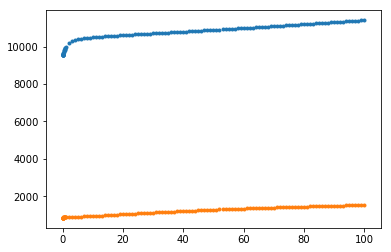

In [65]:
## part 6 plot
x = sse_train.keys()
y = sse_train.values()
plt.scatter(x, y, marker=".")

x = sse_test.keys()
y = sse_test.values()
plt.scatter(x, y, marker=".")

In [ ]:
## part 8 cont

In [43]:
## Extra stuff below ##

In [44]:
print X_train.shape
print w_train.shape

(433L, 14L)
(14L, 1L)


In [45]:
print X_train.T

[[  1.000e+00   1.000e+00   1.000e+00 ...,   1.000e+00   1.000e+00
    1.000e+00]
 [  6.320e-03   2.731e-02   2.729e-02 ...,   6.076e-02   1.096e-01
    4.741e-02]
 [  1.800e+01   0.000e+00   0.000e+00 ...,   0.000e+00   0.000e+00
    0.000e+00]
 ..., 
 [  1.530e+01   1.780e+01   1.780e+01 ...,   2.100e+01   2.100e+01
    2.100e+01]
 [  3.969e+02   3.969e+02   3.928e+02 ...,   3.969e+02   3.934e+02
    3.969e+02]
 [  4.980e+00   9.140e+00   4.030e+00 ...,   5.640e+00   6.480e+00
    7.880e+00]]


In [46]:
# Don't show scientific notation
np.set_printoptions(suppress=True)

print "Printing X_train:"
print X_train

Printing X_train:
[[   1.       0.006   18.    ...,   15.3    396.9      4.98 ]
 [   1.       0.027    0.    ...,   17.8    396.9      9.14 ]
 [   1.       0.027    0.    ...,   17.8    392.83     4.03 ]
 ..., 
 [   1.       0.061    0.    ...,   21.     396.9      5.64 ]
 [   1.       0.11     0.    ...,   21.     393.45     6.48 ]
 [   1.       0.047    0.    ...,   21.     396.9      7.88 ]]


In [47]:
print "Printing y_train:"
print y_train

Printing y_train:
[[ 24. ]
 [ 21.6]
 [ 34.7]
 [ 33.4]
 [ 36.2]
 [ 28.7]
 [ 22.9]
 [ 27.1]
 [ 16.5]
 [ 18.9]
 [ 15. ]
 [ 18.9]
 [ 21.7]
 [ 20.4]
 [ 18.2]
 [ 19.9]
 [ 23.1]
 [ 17.5]
 [ 20.2]
 [ 18.2]
 [ 13.6]
 [ 19.6]
 [ 15.2]
 [ 14.5]
 [ 15.6]
 [ 12.7]
 [ 14.5]
 [ 13.2]
 [ 13.1]
 [ 13.5]
 [ 18.9]
 [ 20. ]
 [ 21. ]
 [ 24.7]
 [ 30.8]
 [ 34.9]
 [ 26.6]
 [ 25.3]
 [ 24.7]
 [ 21.2]
 [ 19.3]
 [ 20. ]
 [ 19.7]
 [ 20.5]
 [ 25. ]
 [ 23.4]
 [ 18.9]
 [ 35.4]
 [ 24.7]
 [ 31.6]
 [ 23.3]
 [ 19.6]
 [ 18.7]
 [ 16. ]
 [ 22.2]
 [ 25. ]
 [ 33. ]
 [ 23.5]
 [ 19.4]
 [ 22. ]
 [ 17.4]
 [ 20.9]
 [ 24.2]
 [ 21.7]
 [ 22.8]
 [ 23.4]
 [ 24.1]
 [ 21.4]
 [ 23.9]
 [ 24.8]
 [ 22.9]
 [ 23.9]
 [ 26.6]
 [ 22.5]
 [ 22.2]
 [ 23.6]
 [ 28.7]
 [ 22.6]
 [ 22. ]
 [ 22.9]
 [ 25. ]
 [ 20.6]
 [ 28.4]
 [ 21.4]
 [ 38.7]
 [ 43.8]
 [ 33.2]
 [ 27.5]
 [ 20.1]
 [ 19.5]
 [ 19.5]
 [ 20.4]
 [ 19.8]
 [ 19.4]
 [ 21.7]
 [ 22.8]
 [ 18.8]
 [ 18.7]
 [ 18.5]
 [ 18.3]
 [ 21.2]
 [ 19.2]
 [ 20.4]
 [ 19.3]
 [ 22. ]
 [ 20.3]
 [ 20.5]
 [ 17.3]
 [ 18.8]
 

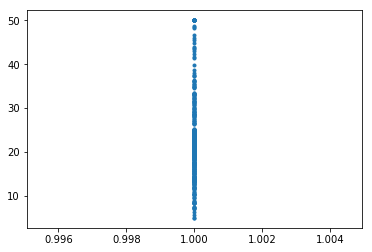

In [48]:
# Plot feature 1: Crime rate by town
plt.scatter(X_train[:, 0],y_train, marker=".")

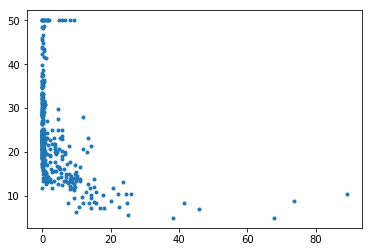

In [49]:
# Plot feature 2: Residential land zoned for lots over 25,0000 sq. ft
plt.scatter(X_train[:, 1],y_train, marker=".")

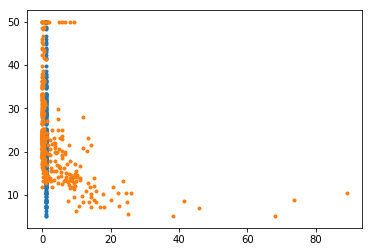

In [50]:
# Multiplotting feature 1 & 2
plt.scatter(X_train[:, 0],y_train, marker=".")
plt.scatter(X_train[:, 1],y_train, marker=".")

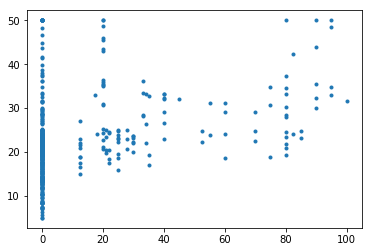

In [51]:
# Plot feature 3: Proportion of non-retail business acres per town
plt.scatter(X_train[:, 2],y_train, marker=".")

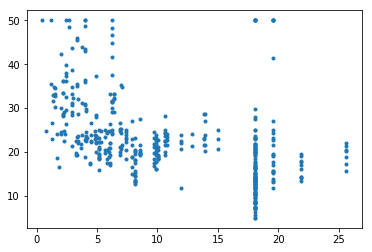

In [52]:
# Plot feature 4: Charles River dummy variable (= 1 if tract bounds river, 0 otherwise)
plt.scatter(X_train[:, 3],y_train, marker=".")

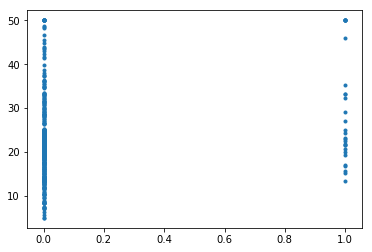

In [53]:
# Plot feature 5: Nitric oxides concentration (parts per 10 million)
plt.scatter(X_train[:, 4],y_train, marker=".")

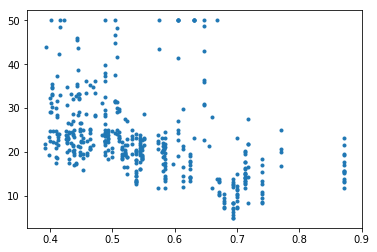

In [54]:
# Plot feature 6: Average number fo rooms per dwelling
plt.scatter(X_train[:, 5],y_train, marker=".")

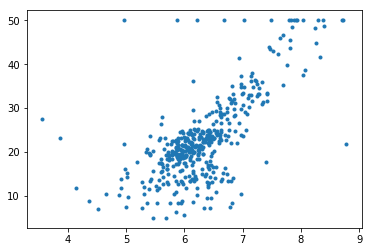

In [55]:
# Plot feature 7: Porportion of owner-occupied units built prior to 1940
plt.scatter(X_train[:, 6],y_train, marker=".")

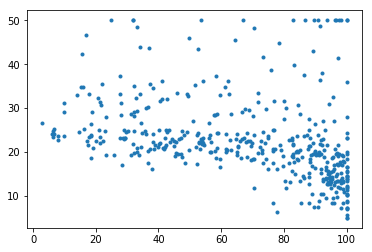

In [56]:
# Plot feature 8: Weighted distances to five Boston employment centers
plt.scatter(X_train[:, 7],y_train, marker=".")

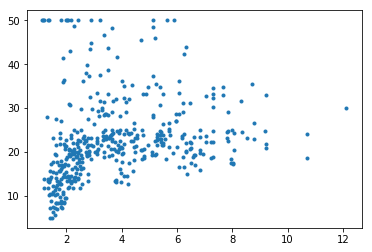

In [57]:
# Plot feature 9: Index of accessability to radial highways
plt.scatter(X_train[:, 8],y_train, marker=".")

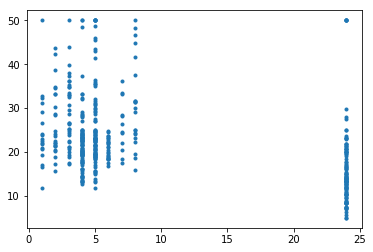

In [58]:
# Plot feature 10: Full-value property-tax rate per $10,000
plt.scatter(X_train[:, 9],y_train, marker=".")

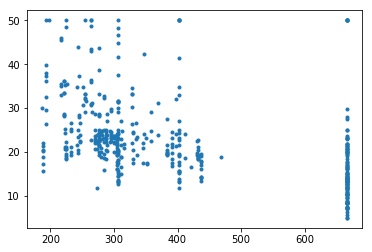

In [59]:
# Plot feature 11: Pupil-teacher ratio by town
plt.scatter(X_train[:, 10],y_train, marker=".")

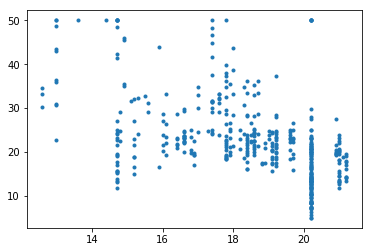

In [60]:
# Plot feature 12: 1000(Bk - 0.63)^2 where Bk is the population fo blacks by town
plt.scatter(X_train[:, 11],y_train, marker=".")

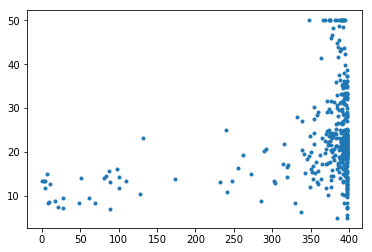

In [61]:
# Plot feature 13: % lower status of the population
plt.scatter(X_train[:, 12],y_train, marker=".")